<a href="https://colab.research.google.com/github/Stepan229/1234/blob/master/Laba%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import numpy as np

output_notebook()
 
#https://coderoad.ru/43639978/Pandas-%D1%82%D1%80%D0%B0%D0%BD%D1%81%D0%BF%D0%BE%D0%BD%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D1%82%D1%8C-%D1%81%D1%82%D1%80%D0%BE%D0%BA%D0%B8-%D0%B2-%D1%81%D1%82%D0%BE%D0%BB%D0%B1%D1%86%D1%8B
#https://codeindex.ru/q/56382385-python-pandas-dataframe-groupby-zatem-transponirovat.html

In [4]:
#Получение и чтение файла из облака
url = "https://drive.google.com/uc?export=download&id=162eDBqCYWbPpXSFuVNiUmL1xyYSjDNeS"
input_df = pd.read_excel(url)
input_df.head()
   

,Дата,Выработка
0,2013-01-01,103256.7
1,2013-02-01,91532.6
2,2013-03-01,97809.1
3,2013-04-01,85131.0
4,2013-05-01,79080.8


In [5]:
#input_df = input_df.sort_values(['Выработка'], ascending = False)
print(input_df)


         Дата  Выработка
0  2013-01-01   103256.7
1  2013-02-01    91532.6
2  2013-03-01    97809.1
3  2013-04-01    85131.0
4  2013-05-01    79080.8
..        ...        ...
81 2019-10-01    93200.0
82 2019-11-01    98900.0
83 2019-12-01   104400.0
84 2019-11-01    98900.0
85 2019-12-01   104400.0

[86 rows x 2 columns]


In [6]:
input_df_2 = input_df.copy()
input_df_2['Мощность'] = input_df_2['Выработка'] / (30.4167*24)
print(input_df_2)

         Дата  Выработка    Мощность
0  2013-01-01   103256.7  141.447379
1  2013-02-01    91532.6  125.386986
2  2013-03-01    97809.1  133.984922
3  2013-04-01    85131.0  116.617680
4  2013-05-01    79080.8  108.329744
..        ...        ...         ...
81 2019-10-01    93200.0  127.671093
82 2019-11-01    98900.0  135.479304
83 2019-12-01   104400.0  143.013542
84 2019-11-01    98900.0  135.479304
85 2019-12-01   104400.0  143.013542

[86 rows x 3 columns]


In [7]:
print(input_df_2[['Дата', 'Мощность']])

         Дата    Мощность
0  2013-01-01  141.447379
1  2013-02-01  125.386986
2  2013-03-01  133.984922
3  2013-04-01  116.617680
4  2013-05-01  108.329744
..        ...         ...
81 2019-10-01  127.671093
82 2019-11-01  135.479304
83 2019-12-01  143.013542
84 2019-11-01  135.479304
85 2019-12-01  143.013542

[86 rows x 2 columns]


In [15]:
print(input_df_2.iloc[: -2, 2 : 4])
print()
print(input_df_2.iloc[1 , 1])

      Мощность
0   141.447379
1   125.386986
2   133.984922
3   116.617680
4   108.329744
..         ...
79  113.835492
80  115.068367
81  127.671093
82  135.479304
83  143.013542

[84 rows x 1 columns]

91532.6


In [70]:
mean_df = input_df_2[input_df_2.Выработка > 100000]
print(mean_df)


         Дата  Выработка    Мощность
0  2013-01-01   103256.7  141.447379
11 2013-12-01   100313.3  137.415329
12 2014-01-01   101175.4  138.596286
23 2014-12-01   103343.5  141.566283
24 2015-01-01   101681.9  139.290121
35 2015-12-01   100301.4  137.399028
36 2016-01-01   104243.7  142.799433
47 2016-12-01   106081.4  145.316827
48 2017-01-01   104178.5  142.710118
59 2017-12-01   102786.7  140.803544
60 2018-01-01   103603.5  141.922447
62 2018-03-01   100500.0  137.671082
71 2018-12-01   107520.0  147.287510
72 2019-01-01   105700.0  144.794362
83 2019-12-01   104400.0  143.013542
85 2019-12-01   104400.0  143.013542


In [68]:
mean = np.mean(mean_df.Выработка)
 
print(mean)

103342.875


In [69]:

print(mean_df)
mean_df = (mean_df[['Выработка', 'Мощность']])

    Выработка    Мощность
0    103256.7  141.447379
11   100313.3  137.415329
12   101175.4  138.596286
23   103343.5  141.566283
24   101681.9  139.290121
35   100301.4  137.399028
36   104243.7  142.799433
47   106081.4  145.316827
48   104178.5  142.710118
59   102786.7  140.803544
60   103603.5  141.922447
62   100500.0  137.671082
71   107520.0  147.287510
72   105700.0  144.794362
83   104400.0  143.013542
85   104400.0  143.013542


In [79]:
df_date = input_df_2['Дата'].astype(str).str.split('-', expand = True) 
print(df_date.head())
#print(input_df_2['Дата'])
df_gen = pd.DataFrame()
df_gen['Generation'] = input_df_2['Выработка'].astype(float)
df_gen['Month_ID'] = df_date[1].astype(int)
df_gen['Year'] = df_date[0].astype(int)
print(df_gen)

      0   1   2
0  2013  01  01
1  2013  02  01
2  2013  03  01
3  2013  04  01
4  2013  05  01
    Generation  Month_ID  Year
0     103256.7         1  2013
1      91532.6         2  2013
2      97809.1         3  2013
3      85131.0         4  2013
4      79080.8         5  2013
..         ...       ...   ...
81     93200.0        10  2019
82     98900.0        11  2019
83    104400.0        12  2019
84     98900.0        11  2019
85    104400.0        12  2019

[86 rows x 3 columns]


Month_ID
1     723839.7
2     651270.4
3     674582.1
4     600488.6
5     565863.0
6     535845.6
7     551404.1
8     562838.0
9     567670.2
10    644995.1
11    770569.3
12    829146.3
Name: Generation, dtype: float64




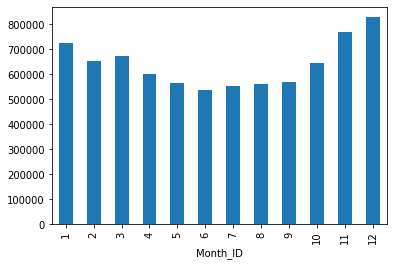

In [80]:
# 14. Статистика суммарной генерации по месяцам.
month_stat = df_gen.groupby(['Month_ID'])['Generation'].sum()
print(month_stat)
print()
month_stat.plot(kind = 'bar')
print()

In [90]:
p = figure(plot_width = 800, plot_height = 400)

# Список цветов по количеству лет.
colors = ['magenta', 'red', 'yellow', 'green', 'cyan', 'blue', 'black']

# Для каждого года свой график.
for year in range(2013, 2019):
  
  # Выбор из таблицы данных по выработке за нужный год. 
  values = df_gen[df_gen['Year'] == year]['Generation'].values 
  
  # Построение линий.
  p.line(np.arange(12), values, color = colors[year - 2013], legend_label = str(year), line_width = 3)

  # Построение маркеров.
  p.circle(np.arange(12), values, color = colors[year - 2013], alpha=0.5, size = 8)
show(p)